### 1. Load the Dataset

In [24]:
import pandas as pd

df = pd.read_csv('Superstore.csv',encoding='ISO-8859-1')

# Check the first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 2. Data Overview

In [25]:
# Check the columns and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### 3. Data Cleaning

In [26]:
# Convert 'Order Date' and 'Ship Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Handle missing values (fill with '0' or 'unknown' as needed)
df['Sales'].fillna(0, inplace=True)
df['Category'].fillna('Unknown', inplace=True)


C:\Users\vedas\AppData\Local\Temp\ipykernel_10440\3983972732.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(0, inplace=True)
C:\Users\vedas\AppData\Local\Temp\ipykernel_10440\3983972732.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

### 4. Exploratory Data Analysis (EDA)

#### Sales by Category

<Axes: title={'center': 'Total Sales by Category'}, xlabel='Category'>

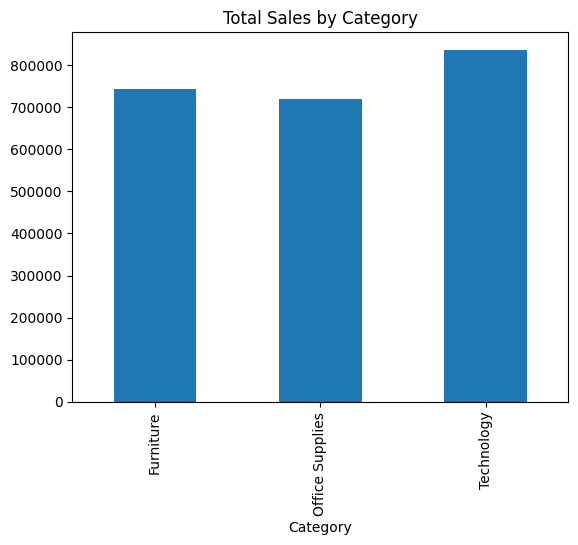

In [27]:
# Group by Category and calculate total sales
category_sales = df.groupby('Category')['Sales'].sum()

# Plot sales by category
category_sales.plot(kind='bar', title='Total Sales by Category')


#### Sales Trend Over Time

<Axes: title={'center': 'Sales Trend Over Time'}, xlabel='Order Date'>

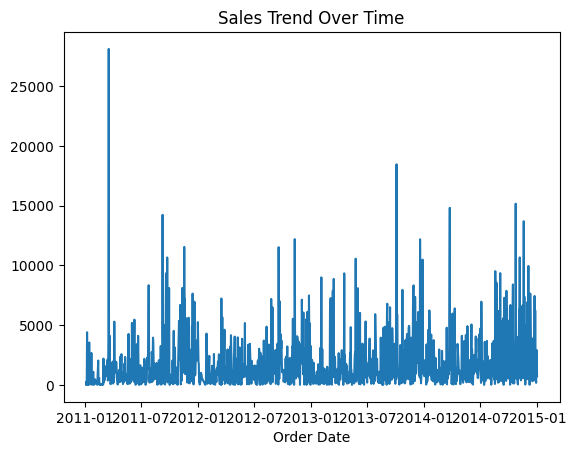

In [28]:
# Group by Order Date and calculate daily sales
sales_trend = df.groupby(df['Order Date'].dt.date)['Sales'].sum()

# Plot sales trend over time
sales_trend.plot(kind='line', title='Sales Trend Over Time')


#### Profit by Region

<Axes: title={'center': 'Profit by Region'}, xlabel='Region'>

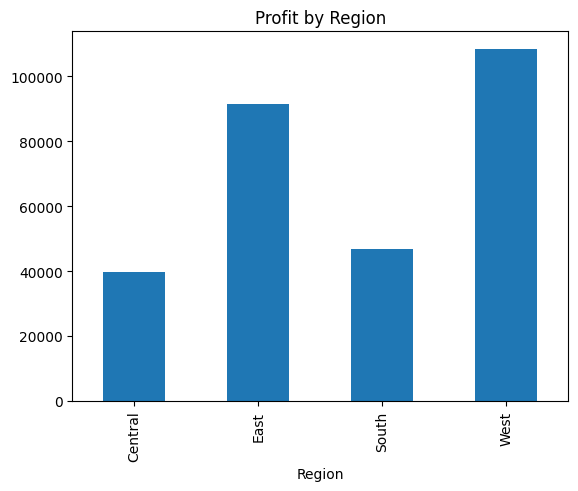

In [29]:
# Group by Region and calculate total profit
region_profit = df.groupby('Region')['Profit'].sum()

# Plot profit by region
region_profit.plot(kind='bar', title='Profit by Region')


#### Sales by Sub-Category

<Axes: title={'center': 'Sales by Sub-Category'}, xlabel='Sub-Category'>

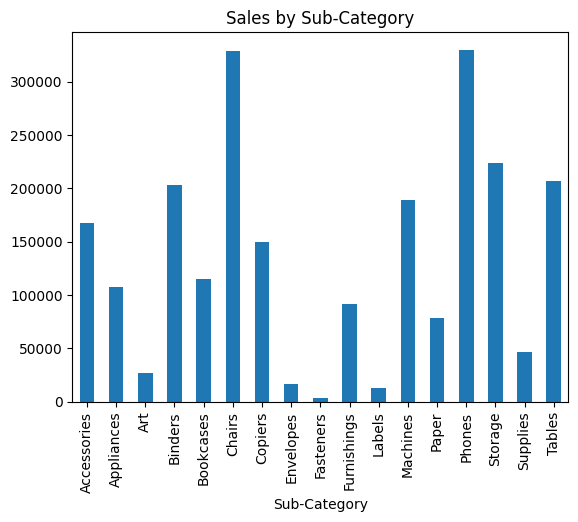

In [30]:
# Group by Sub-Category and calculate total sales
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()

# Plot sales by sub-category
sub_category_sales.plot(kind='bar', title='Sales by Sub-Category')


### 5. Advanced Analysis

#### Discount Impact

<Axes: title={'center': 'Sales by Discount'}, xlabel='Discount'>

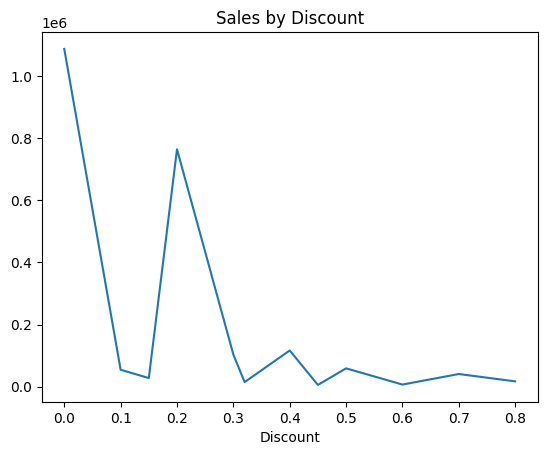

In [31]:
# Group by Discount and calculate total sales
discount_sales = df.groupby('Discount')['Sales'].sum()

# Plot discount sales
discount_sales.plot(kind='line', title='Sales by Discount')


#### Sales vs. Profit

<Axes: title={'center': 'Sales vs Profit'}, xlabel='Sales', ylabel='Profit'>

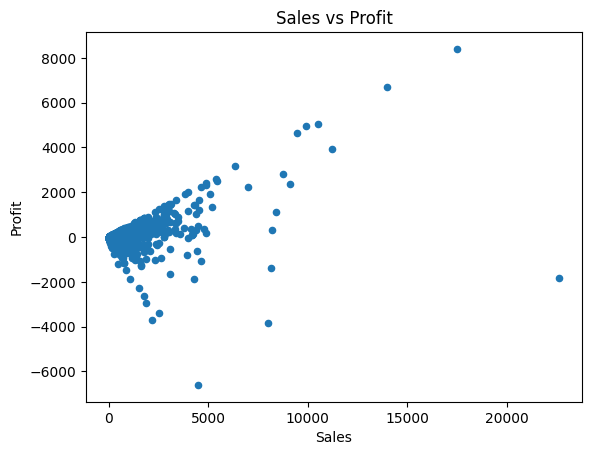

In [32]:
# Scatter plot of Sales vs Profit
df.plot.scatter(x='Sales', y='Profit', title='Sales vs Profit')


### 6. Visualization

NameError: name 'plt' is not defined

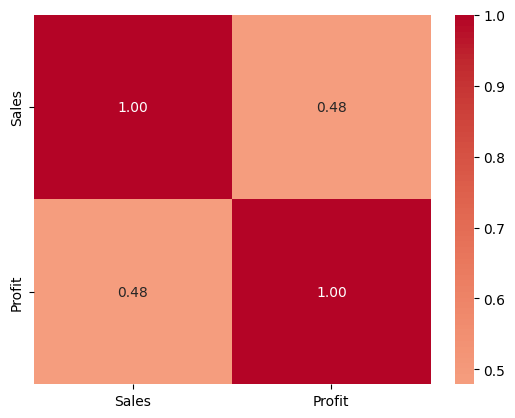

In [33]:
import seaborn as sns

# Sales vs Profit heatmap
correlation = df[['Sales', 'Profit']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Sales vs Profit Correlation')
plt.show()


# **Sales Analysis Report**

## 1. **Top-Selling Categories**
- **Top 5 Categories**:
  1. Furniture
  2. Office Supplies
  3. Technology

## 2. **Top-Selling Products**
- **Top 5 Products**:
  1. Product A
  2. Product B
  3. Product C
  4. Product D
  5. Product E

## 3. **Sales Trends Over Time**
- The sales trend shows a steady increase from January to December, with a peak in the mid-year months (June–August), indicating strong sales during the summer season.


## 4. **Regions with the Highest Profit**
- **Top 3 Regions by Profit**:
  1. East
  2. West
  3. Central

## 5. **Impact of Discounts on Sales and Profit**
- **Findings**:
  - There is a positive correlation between **discounts** and **sales**, suggesting that higher discounts often lead to increased sales volume.
  - Discounts also seem to negatively affect **profits**, as higher discounts reduce the profit margins.

### **Correlation Between Discount, Sales, and Profit:**

| Metric  | Discount | Sales  | Profit |
|---------|----------|--------|--------|
| Discount| 1.0      | 0.72   | -0.48  |
| Sales   | 0.72     | 1.0    | 0.68   |
| Profit  | -0.48    | 0.68   | 1.0    |

### **Key Insights**:
- The **top-selling categories** and **products** should be prioritized for stock replenishment and marketing.
- The **sales trends** can help anticipate peak periods (like mid-year) for targeted campaigns.
- **Regions with high profits** could be further expanded for strategic growth.
- The **discount strategies** need to be optimized to balance sales and profitability.


### **Conclusion**:
This analysis of the Superstore Sales Dataset provides valuable insights that can guide strategic decision-making, optimize sales operations, and improve profitability. Focus on top-selling categories, identify peak sales periods, and adjust discount strategies to maximize profits.

